In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: Qt5Agg


## Load Dataset

HS6 REV. 2007 (2008 - 2017) https://atlas.media.mit.edu/en/resources/data/

In [2]:
data = pd.read_csv("bilateral.csv") #Product Trade by Year and Country (2 digit depth)
data.head()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


In [3]:
data.tail()

,Unnamed: 0,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
1915,1915,93.0,2017,8.709500e+04,1.891823e+07,0.004,0.951,4.060296e-07,0.000094,vietnam
1916,1916,94.0,2017,8.462657e+09,1.264328e+09,9.786,2.686,3.945219e-02,0.006257,vietnam
1917,1917,95.0,2017,1.807360e+09,5.063306e+08,6.024,4.607,8.425758e-03,0.002506,vietnam
1918,1918,96.0,2017,4.294399e+08,7.398881e+08,17.468,27.725,2.002013e-03,0.003661,vietnam
1919,1919,97.0,2017,2.622439e+06,1.968601e+06,0.116,0.088,1.222559e-05,0.000010,vietnam


In [4]:
del data["Unnamed: 0"]
indo = data.loc[data["country"] == "indonesia"]
print (indo.shape)
indo.info()

(960, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 959
Data columns (total 9 columns):
hs07               960 non-null float64
year               960 non-null int64
export_val         960 non-null float64
import_val         960 non-null float64
export_rca         960 non-null float64
import_rca         960 non-null float64
export_val_perc    960 non-null float64
import_val_perc    960 non-null float64
country            960 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 75.0+ KB


In [5]:
indo = indo.reset_index()
indo.head()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country
0,0,1.0,2008,6.343198e+07,358611772.0,2.709450,9.323941,0.000489,0.003636,indonesia
1,1,2.0,2008,3.252633e+07,238646027.0,3.339772,3.733699,0.000251,0.002420,indonesia
2,2,3.0,2008,2.238172e+09,98839096.0,21.517980,1.280112,0.017256,0.001002,indonesia
3,3,4.0,2008,4.052109e+08,859054164.0,88.878893,13.697648,0.003124,0.008710,indonesia
4,4,5.0,2008,2.466984e+07,49579023.0,13.126789,16.261980,0.000190,0.000503,indonesia


## Calculating HHI

In [6]:
indo["HH_X"] = (indo["export_val_perc"] * 100) ** 2
indo["HH_M"] = (indo["import_val_perc"] * 100) ** 2
indo.tail()

,index,hs07,year,export_val,import_val,export_rca,import_rca,export_val_perc,import_val_perc,country,HH_X,HH_M
955,955,93.0,2017,8.734688e+05,3.808504e+08,0.073,35.315,0.000005,0.002477,indonesia,2.190871e-07,0.061375
956,956,94.0,2017,2.050951e+09,8.455012e+08,3.259,4.501,0.010990,0.005500,indonesia,1.207904e+00,0.302490
957,957,95.0,2017,7.321279e+08,3.205711e+08,3.470,4.571,0.003923,0.002085,indonesia,1.539203e-01,0.043484
958,958,96.0,2017,3.029797e+08,4.565936e+08,17.059,22.840,0.001624,0.002970,indonesia,2.636022e-02,0.088215
959,959,97.0,2017,2.167994e+08,3.099755e+06,1.614,0.180,0.001162,0.000020,indonesia,1.349703e-02,0.000004


In [7]:
hhi = indo.groupby("year")[["HH_X", "HH_M"]].sum()
hhi["ratio"] = hhi["HH_X"] / hhi["HH_M"]
hhi.head()

,HH_X,HH_M,ratio
year,,,
2008,1098.512968,853.819307,1.286587
2009,956.221090,870.359125,1.098651
2010,1090.248608,886.966563,1.229188
2011,1252.490926,953.134872,1.314075
2012,1276.210147,935.632062,1.364009


## Plot Trend HH Index over time

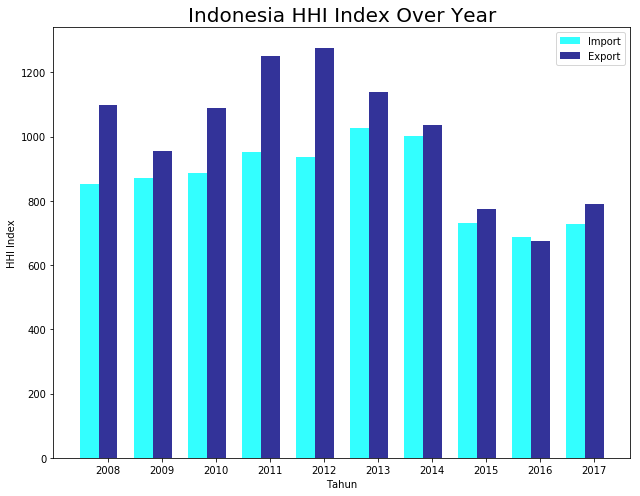

In [8]:
bar_width = 0.35
opacity = 0.8
plt.figure(figsize=(9,7))
rects1 = plt.bar(hhi.index, hhi.HH_M, bar_width, alpha=opacity, color='aqua', label='Import')
rects2 = plt.bar(hhi.index + bar_width, hhi.HH_X, bar_width, alpha=opacity, color='navy', label='Export')

plt.xlabel('Tahun')
plt.ylabel('HHI Index')
plt.title('Indonesia HHI Index Over Year', size=20)
plt.xticks(hhi.index + bar_width, ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
plt.legend()
plt.tight_layout()
plt.show()

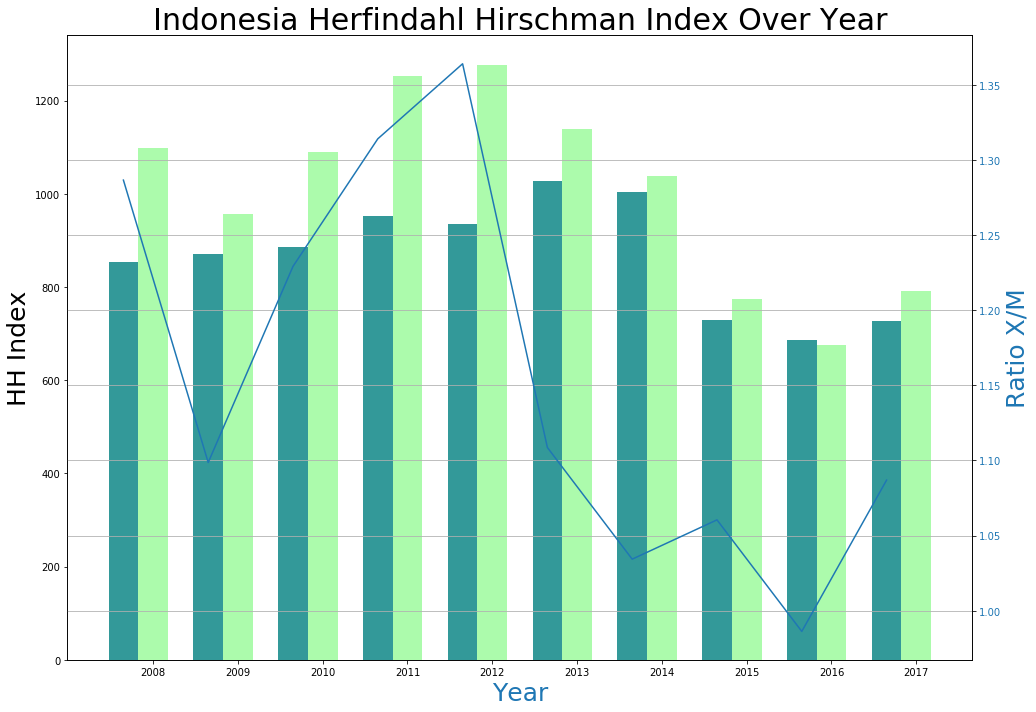

In [9]:
bar_width = 0.35
opacity = 0.8
color = 'tab:blue'


fig, ax = plt.subplots(figsize=(14.5, 10))

ax.bar(hhi.index, hhi.HH_M, bar_width, alpha=opacity, color='teal', label='Import')
ax.bar(hhi.index + bar_width, hhi.HH_X, bar_width, alpha=opacity, color='palegreen', label='Export')
ax.set_ylabel('HH Index', color="black", size=25)
ax.set_xlabel('Year', color=color, size=25)

ax2 = ax.twinx()

ax2.plot(hhi.index, hhi.ratio, color=color)
ax2.set_ylabel('Ratio X/M', color=color, size=25)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Indonesia Herfindahl Hirschman Index Over Year', size=30)
plt.xticks(hhi.index + bar_width, ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))

plt.grid(True)
plt.savefig("HHI Index over year Indonesia.png")
plt.tight_layout()
plt.show()